In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load in real ERP data from HNN-GUI example

In [188]:
yes_data = np.loadtxt("HNN-GUI_Real_ERP_data/yes_trial_S1_ERP_all_avg.txt", dtype=float)
yes_data = pd.DataFrame(yes_data)
yes_data

,0,1
0,0.000000,-3.638991
1,1.664960,-1.490771
2,3.329920,-0.021023
3,4.994880,-0.087474
4,6.659840,-0.722413
...,...,...
98,163.166091,52.665098
99,164.831051,50.450053
100,166.496011,48.205214
101,168.160971,46.364935


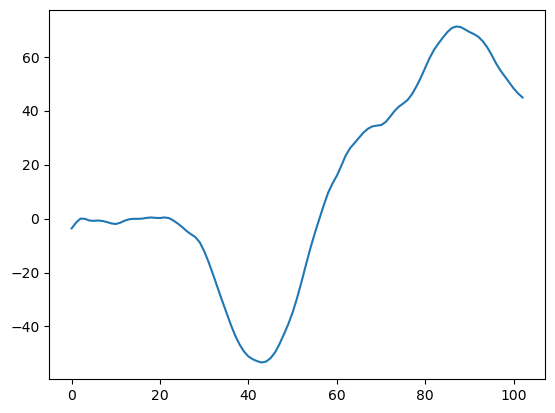

In [189]:
plt.plot(yes_data.iloc[:,1].T)

In [190]:
no_data = np.loadtxt("HNN-GUI_Real_ERP_data/no_trial_S1_ERP_all_avg.txt", dtype=float)
no_data = pd.DataFrame(no_data)
no_data

,0,1
0,0.000000,-17.391097
1,1.664960,-17.522803
2,3.329920,-16.434230
3,4.994880,-14.408149
4,6.659840,-12.348419
...,...,...
98,163.166091,24.583799
99,164.831051,23.377644
100,166.496011,22.072480
101,168.160971,20.803446


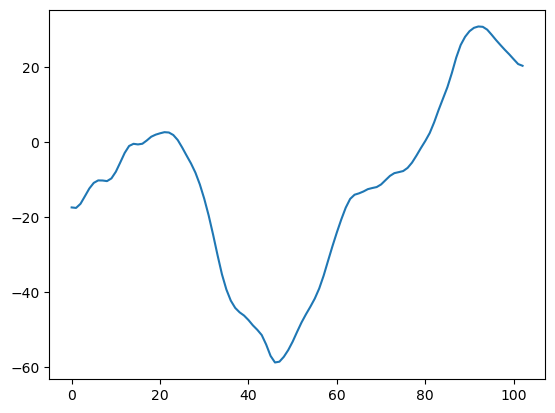

In [191]:
plt.plot(no_data[1])

### resample the data so that the number of time points matches the hnn-core simulations

In [192]:
yes_data['time'] = pd.to_datetime(yes_data[0], unit='s')
yes_data = yes_data.drop(0, axis=1)
yes_data.set_index('time', inplace=True)
yes_data.columns = ['value']
yes_data=yes_data.resample('500ms').first().interpolate()
time_at_341 = pd.to_datetime('1970-01-01 00:02:50.000')
value_at_341 = yes_data.iloc[-1]['value'] + (yes_data.iloc[-1]['value'] - yes_data.iloc[-2]['value']) / 2
yes_data.loc[time_at_341] = value_at_341
yes_data

,value
time,
1970-01-01 00:00:00.000,-3.638991
1970-01-01 00:00:00.500,-2.922918
1970-01-01 00:00:01.000,-2.206844
1970-01-01 00:00:01.500,-1.490771
1970-01-01 00:00:02.000,-1.000855
...,...
1970-01-01 00:02:48.000,46.364935
1970-01-01 00:02:48.500,45.878566
1970-01-01 00:02:49.000,45.392197


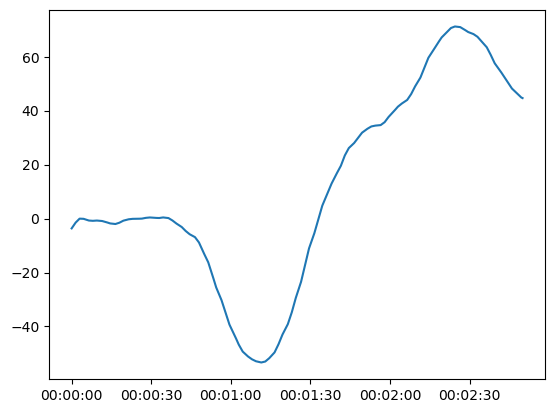

In [193]:
plt.plot(yes_data.iloc[:,0].T)

In [194]:
no_data['time'] = pd.to_datetime(no_data[0], unit='s')
no_data = no_data.drop(0, axis=1)
no_data.set_index('time', inplace=True)
no_data.columns = ['value']
no_data=no_data.resample('500ms').first().interpolate()
time_at_341 = pd.to_datetime('1970-01-01 00:02:50.000')
value_at_341 = no_data.iloc[-1]['value'] + (no_data.iloc[-1]['value'] - no_data.iloc[-2]['value']) / 2
no_data.loc[time_at_341] = value_at_341
no_data

,value
time,
1970-01-01 00:00:00.000,-17.391097
1970-01-01 00:00:00.500,-17.434999
1970-01-01 00:00:01.000,-17.478901
1970-01-01 00:00:01.500,-17.522803
1970-01-01 00:00:02.000,-17.159945
...,...
1970-01-01 00:02:48.000,20.803446
1970-01-01 00:02:48.500,20.648916
1970-01-01 00:02:49.000,20.494385


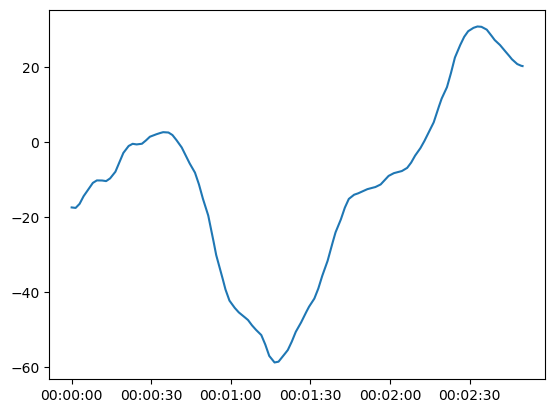

In [195]:
plt.plot(no_data.iloc[:,0].T)

In [196]:
# save yes_data, no_data

np_yes_data = np.array(yes_data['value'])
np_no_data = np.array(no_data['value'])

torch.save(np_yes_data, 'Real_ERP_data/np_yes_data.pt')
torch.save(np_no_data, 'Real_ERP_data/np_no_data.pt')

### scale the simulated out: Read the tutorial for the correct “scaling factor”

### smooth the hnn-core output waveform (smoothing window of 30 ms) (write inside of simulator function so it always returns a smoothed signal)

signal = dpl[0].copy().smooth(30).data['agg']